# House Price

## Theory

* **The main objective is to find the linear function that expresses the relationship between the dependent and independent variable.**

## Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

housePrice = pd.read_csv("house_price_dataset.csv")
df = housePrice.copy()
df

,HouseSize,Rooms,Price
0,83,10,248218.31
1,229,7,381317.37
2,272,10,466820.88
3,187,5,320928.25
4,299,3,388367.41
...,...,...,...
145,106,1,158088.76
146,88,3,180259.56
147,158,4,274081.14
148,230,1,312092.92


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HouseSize  150 non-null    int64  
 1   Rooms      150 non-null    int64  
 2   Price      150 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 3.6 KB


In [3]:
df.isnull().values.any()

False

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HouseSize,150.0,177.613333,72.752203,50.0,119.2500,181.50,235.7500,299.00
Rooms,150.0,5.413333,2.976838,1.0,3.0000,5.00,8.0000,10.00
Price,150.0,310581.277867,86387.330712,130520.3,262135.4975,313094.07,373724.4425,502252.12


In [5]:
df.corr()

,HouseSize,Rooms,Price
HouseSize,1.000000,0.024109,0.849300
Rooms,0.024109,1.000000,0.532038
Price,0.849300,0.532038,1.000000


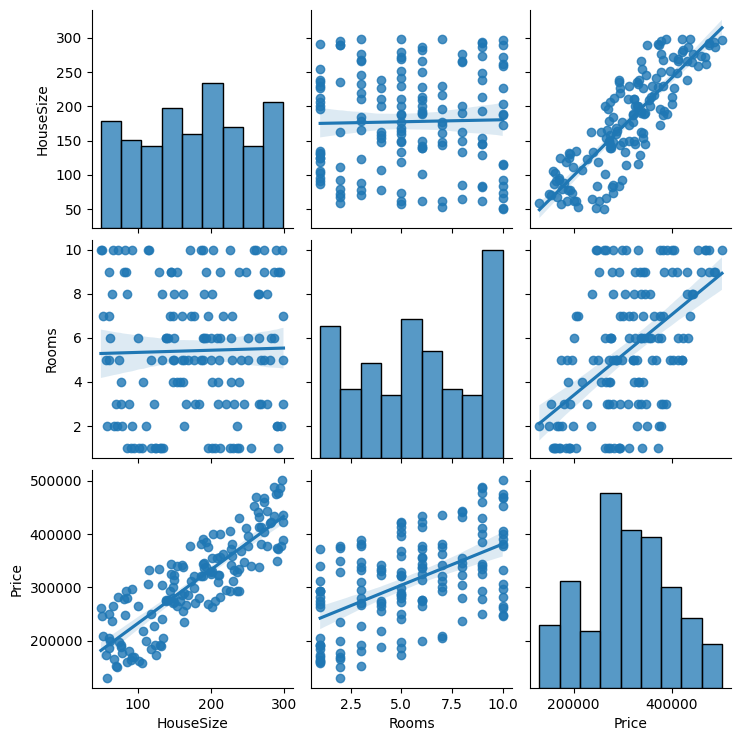

In [6]:
sns.pairplot(df, kind="reg");

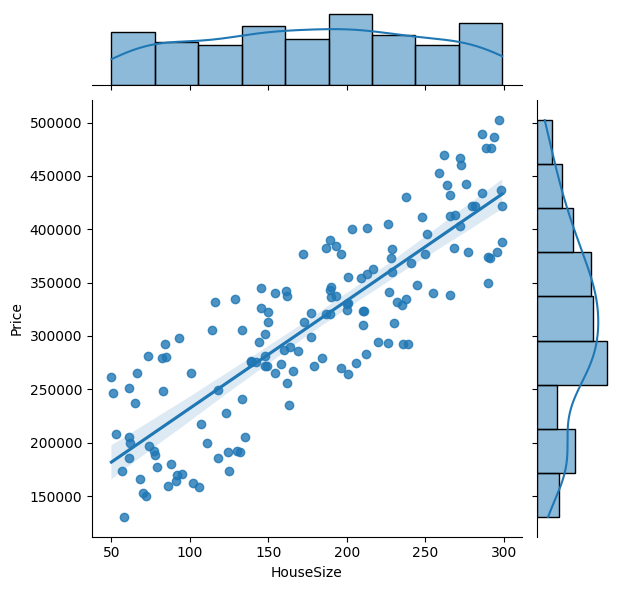

In [7]:
sns.jointplot(x = "HouseSize", y = "Price", kind="reg", data=df);

## Statsmodels

In [8]:
X = df[["HouseSize"]]
X[0:5]

,HouseSize
0,83
1,229
2,272
3,187
4,299


In [9]:
X = sm.add_constant(X)

In [10]:
X[0:5]

,const,HouseSize
0,1.0,83
1,1.0,229
2,1.0,272
3,1.0,187
4,1.0,299


In [11]:
y = df["Price"]
y[0:5]

0    248218.31
1    381317.37
2    466820.88
3    320928.25
4    388367.41
Name: Price, dtype: float64

In [12]:
lm = sm.OLS(y,X)

In [13]:
model = lm.fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     383.1
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           6.68e-43
Time:                        01:07:44   Log-Likelihood:                -1821.5
No. Observations:                 150   AIC:                             3647.
Df Residuals:                     148   BIC:                             3653.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.315e+05   9885.098     13.299      0.000    1.12e+05    1.51e+05
HouseSize   1008.4751     51.527     19.572      0.000     906.652    1110.298
==============================================================================
Omnibus:                       35.331   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.428
Skew:                           0.036   Prob(JB):                       0.0244
Kurtosis:                       1.912   Cond. No.                         508.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model.params

const        131462.645546
HouseSize      1008.475146
dtype: float64

In [16]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,1.315e+05,9885.098,13.299,0.000,1.12e+05,1.51e+05
HouseSize,1008.4751,51.527,19.572,0.000,906.652,1110.298


In [17]:
model.conf_int()

,0,1
const,111928.480866,150996.810226
HouseSize,906.651937,1110.298356


In [18]:
model.f_pvalue

6.679806051923156e-43

In [19]:
print("f_pvalue : ", "%.3f" % model.f_pvalue)

f_pvalue :  0.000


In [20]:
print("fvalue : ", "%.3f" % model.fvalue)

fvalue :  383.058


In [21]:
print("tvalue : ", "%.3f" % model.tvalues[0:1])

tvalue :  13.299


C:\Users\hp\AppData\Local\Temp\ipykernel_20868\1110418876.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("tvalue : ", "%.3f" % model.tvalues[0:1])


In [22]:
model.mse_model

802063891365.3137

In [23]:
model.rsquared

0.721311052341924

In [24]:
model.rsquared_adj

0.7194280189118019

In [25]:
model.fittedvalues[0:5]

0    215166.082690
1    362403.454052
2    405767.885343
3    320047.497907
4    432996.714294
dtype: float64

In [26]:
y[0:5]

0    248218.31
1    381317.37
2    466820.88
3    320928.25
4    388367.41
Name: Price, dtype: float64

## Model Equation

Price = 131462 + HouseSize * 1008.4751

## Model Visualisation

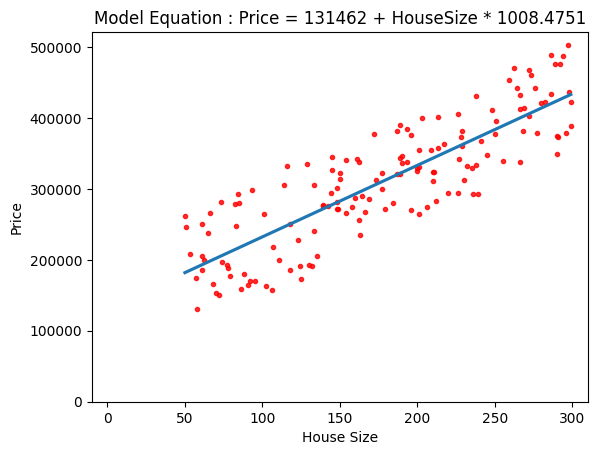

In [27]:
g = sns.regplot(x=df["HouseSize"], y=df["Price"], ci=None, scatter_kws={'color': 'r', 's': 9})
g.set_title("Model Equation : Price = 131462 + HouseSize * 1008.4751")
g.set_ylabel("Price")
g.set_xlabel("House Size")
plt.xlim(-10, 310)
plt.ylim(bottom=0);

## Model Prediction

### Model Equation

**Price = 131462 + HouseSize * 1008.4751**

How much is a 30 square metre house ?

In [28]:
X = df[["HouseSize"]]
y = df["Price"]
reg = LinearRegression()
model = reg.fit(X,y)

In [29]:
131462 + 30 * 1008.4751

161716.253

In [30]:
model.predict([[30]])

C:\Users\hp\anaconda3\envs\webscraping\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([161716.89993545])

In [31]:
new_data = [[125],[250],[95]]

In [32]:
model.predict(new_data)

C:\Users\hp\anaconda3\envs\webscraping\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([257522.03883527, 383581.43212451, 227267.78444585])

## Error Investigation and Resid

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
lm = smf.ols("Price ~ HouseSize", df)
model = lm.fit()

In [35]:
mse = mean_squared_error(y, model.fittedvalues)

In [36]:
mse

2065926492.354019

In [37]:
rmse = np.sqrt(mse)

In [38]:
rmse

45452.464095514326

In [39]:
reg.predict(X)[0:10]

array([215166.08269009, 362403.45405192, 405767.88534341, 320047.49790673,
       432996.71429389, 329123.77422356, 368454.3049298 , 277691.54176155,
       181886.40286173, 430979.76400126])

In [40]:
y[0:10]

0    248218.31
1    381317.37
2    466820.88
3    320928.25
4    388367.41
5    376392.58
6    328967.94
7    326100.90
8    261496.23
9    502252.12
Name: Price, dtype: float64

In [41]:
comparison_table = pd.DataFrame({"real_y_values" : y[0:10],
                                "predicted_y_values" : reg.predict(X)[0:10]})

In [42]:
comparison_table

,real_y_values,predicted_y_values
0,248218.31,215166.082690
1,381317.37,362403.454052
2,466820.88,405767.885343
3,320928.25,320047.497907
4,388367.41,432996.714294
5,376392.58,329123.774224
6,328967.94,368454.304930
7,326100.90,277691.541762
8,261496.23,181886.402862
9,502252.12,430979.764001


In [43]:
comparison_table["error"] = comparison_table["real_y_values"] - comparison_table["predicted_y_values"]

In [44]:
comparison_table

,real_y_values,predicted_y_values,error
0,248218.31,215166.082690,33052.227310
1,381317.37,362403.454052,18913.915948
2,466820.88,405767.885343,61052.994657
3,320928.25,320047.497907,880.752093
4,388367.41,432996.714294,-44629.304294
5,376392.58,329123.774224,47268.805776
6,328967.94,368454.304930,-39486.364930
7,326100.90,277691.541762,48409.358238
8,261496.23,181886.402862,79609.827138
9,502252.12,430979.764001,71272.355999


In [45]:
comparison_table["error_abs"] = comparison_table["error"].abs()

In [46]:
comparison_table

,real_y_values,predicted_y_values,error,error_abs
0,248218.31,215166.082690,33052.227310,33052.227310
1,381317.37,362403.454052,18913.915948,18913.915948
2,466820.88,405767.885343,61052.994657,61052.994657
3,320928.25,320047.497907,880.752093,880.752093
4,388367.41,432996.714294,-44629.304294,44629.304294
5,376392.58,329123.774224,47268.805776,47268.805776
6,328967.94,368454.304930,-39486.364930,39486.364930
7,326100.90,277691.541762,48409.358238,48409.358238
8,261496.23,181886.402862,79609.827138,79609.827138
9,502252.12,430979.764001,71272.355999,71272.355999


In [47]:
comparison_table["squared_error"] = comparison_table["error"]**2

In [48]:
comparison_table

,real_y_values,predicted_y_values,error,error_abs,squared_error
0,248218.31,215166.082690,33052.227310,33052.227310,1.092450e+09
1,381317.37,362403.454052,18913.915948,18913.915948,3.577362e+08
2,466820.88,405767.885343,61052.994657,61052.994657,3.727468e+09
3,320928.25,320047.497907,880.752093,880.752093,7.757242e+05
4,388367.41,432996.714294,-44629.304294,44629.304294,1.991775e+09
5,376392.58,329123.774224,47268.805776,47268.805776,2.234340e+09
6,328967.94,368454.304930,-39486.364930,39486.364930,1.559173e+09
7,326100.90,277691.541762,48409.358238,48409.358238,2.343466e+09
8,261496.23,181886.402862,79609.827138,79609.827138,6.337725e+09
9,502252.12,430979.764001,71272.355999,71272.355999,5.079749e+09


In [49]:
np.sum(comparison_table["squared_error"])

24724656915.735966

In [50]:
np.mean(comparison_table["squared_error"])

2472465691.5735965

### MSE

In [51]:
np.sqrt(np.mean(comparison_table["squared_error"]))

49723.89457367148

In [52]:
model.resid[0:10]

0    33052.227310
1    18913.915948
2    61052.994657
3      880.752093
4   -44629.304294
5    47268.805776
6   -39486.364930
7    48409.358238
8    79609.827138
9    71272.355999
dtype: float64

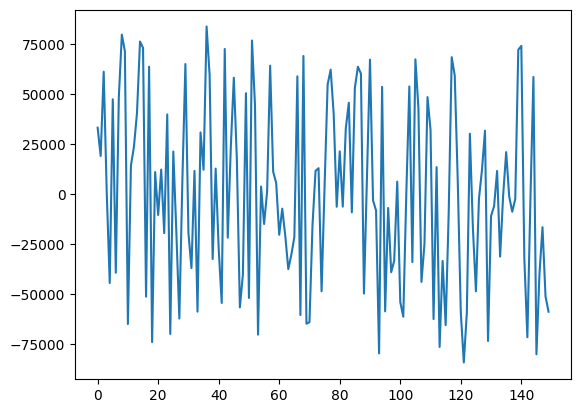

In [53]:
plt.plot(model.resid)